In [1]:
%run project_functions.ipynb

Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

In [2]:
file_name = 'FB.txt'
csv_name = 'FB.csv'

In [3]:
#Features
company = stock_twits_text_parser(file_name)
company_metrics = stock_twits_metrics(company, 3, file_name)

#Labels
company_return = return_over_period_T(csv_name,3)

#Number of Trees:
n = 400

#Cleaned Data
agg_data = feature_selector(company_metrics, company_return, 'close_return', 25, n)
company_data = split_data(agg_data, 0.7, 'all', 'close_return', 'bin')

#Split
X_train = company_data['X_train']
Y_train = company_data['Y_train']
X_test = company_data['X_test']
Y_test = company_data['Y_test']

In [4]:
#Fit Model
clf_rf = RandomForestClassifier().fit(X_train, Y_train)

#Predict
pred_train_rf = clf_rf.predict(X_train)
pred_test_rf = clf_rf.predict(X_test)

In [5]:
#Generate Confusion Matrices
confusion_train_rf = confusion_matrix(Y_train, pred_train_rf)
confusion_test_rf = confusion_matrix(Y_test, pred_test_rf)

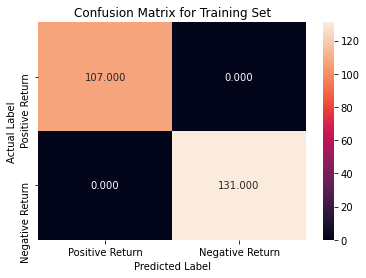

In [6]:
#Plot Confusion Matrix for Training Data
plot_confusion_matrix(confusion_train_rf, "Training")

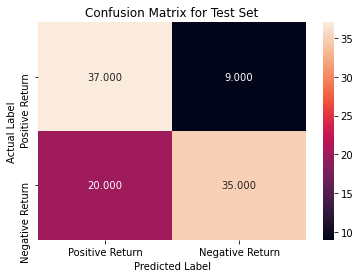

In [7]:
#Plot Confusion Matrix for Test Data
plot_confusion_matrix(confusion_test_rf, "Test")

In [8]:
#Calculate Metrics
tablerf = create_metrics_table(Y_train, pred_train_rf, Y_test, pred_test_rf)
tablerf

,Recall,Precision,F1 Score,Accuracy
Dataset,,,,
Training,1.000000,1.000000,1.000000,1.000000
Test,0.636364,0.795455,0.707071,0.712871


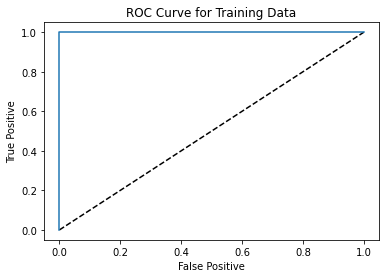

In [9]:
#Generate ROC Curves for Training
pred_train_prob_rf = clf_rf.predict_proba(X_train)[:,1]
FPR_train, TPR_train, Threshold_train = roc_curve(Y_train, pred_train_prob_rf)

#Plot ROC Curve for Training Data
plot_ROC_curve(FPR_train, TPR_train, "Training")

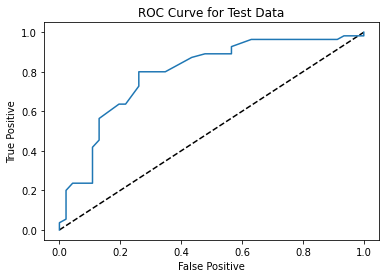

In [10]:
#Generate ROC Curves for Test
pred_test_prob_rf = clf_rf.predict_proba(X_test)[:,1]
FPR_test, TPR_test, Threshold_test = roc_curve(Y_test, pred_test_prob_rf)

#Plot ROC Curve for Test Data
plot_ROC_curve(FPR_test, TPR_test, "Test")

In [11]:
#Fit Model
clf_et = ExtraTreesClassifier().fit(X_train, Y_train)

#Predict
pred_train_et = clf_et.predict(X_train)
pred_test_et = clf_et.predict(X_test)

In [12]:
#Generate Confusion Matrices
confusion_train_et = confusion_matrix(Y_train, pred_train_et)
confusion_test_et = confusion_matrix(Y_test, pred_test_et)

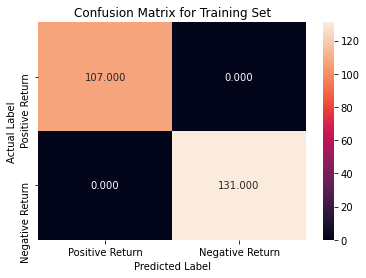

In [13]:
#Plot Confusion Matrix for Training Data
plot_confusion_matrix(confusion_train_et, "Training")

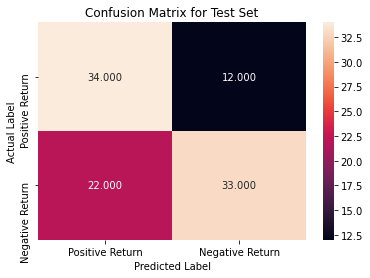

In [14]:
#Plot Confusion Matrix for Test Data
plot_confusion_matrix(confusion_test_et, "Test")

In [15]:
#Calculate Metrics
tableet = create_metrics_table(Y_train, pred_train_et, Y_test, pred_test_et)
tableet

,Recall,Precision,F1 Score,Accuracy
Dataset,,,,
Training,1.0,1.000000,1.00,1.000000
Test,0.6,0.733333,0.66,0.663366


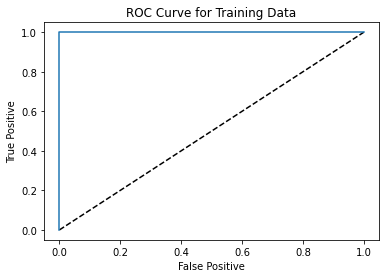

In [16]:
#Generate ROC Curves for Training
pred_train_prob_et = clf_et.predict_proba(X_train)[:,1]
FPR_train, TPR_train, Threshold_train = roc_curve(Y_train, pred_train_prob_et)

#Plot ROC Curve for Training Data
plot_ROC_curve(FPR_train, TPR_train, "Training")

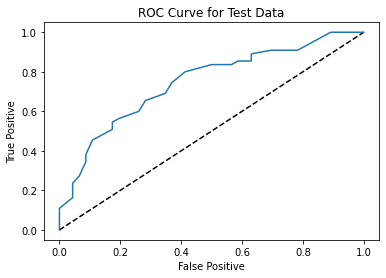

In [17]:
#Generate ROC Curves for Test
pred_test_prob_et = clf_et.predict_proba(X_test)[:,1]
FPR_test, TPR_test, Threshold_test = roc_curve(Y_test, pred_test_prob_et)

#Plot ROC Curve for Test Data
plot_ROC_curve(FPR_test, TPR_test, "Test")